<a href="https://colab.research.google.com/github/BhargaviAkuthota/IDP/blob/main/batch_2_code(idp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/BhargaviAkuthota/IDP.git

Cloning into 'IDP'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [2]:
 import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)

In [ ]:
fires = pd.read_csv("Forestfires.csv")    #reading the dataset
fires.head(15)    #show the first 15 instances of dataset


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [ ]:
#show the last 10 instances of dataset
fires.tail(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [ ]:
#changing days into numeric quantity because machine learning model deals with numbers
fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

#changing month into numeric quantity
fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

#showing first 10 instances of dataset after converting days and months into numbers
fires.head(15)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [ ]:
#generate descriptive statistics of each attribute
fires.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
month,517.0,7.475822,2.275990,1.0,7.0,8.00,9.00,12.00
day,517.0,4.259188,2.072929,1.0,2.0,5.00,6.00,7.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00


In [ ]:
#given area of land burnt, but we have to predict if there is fire or not so changing values of area to 0 and 1 only
#here 0 represet there is not fire and 1 represent fire, changing all values of area which are greater than 0 to 1
fires['area'].values[fires['area'].values > 0] = 1

#renaming the area attribute to output for clear understanding
fires = fires.rename(columns={'area': 'output'})
fires.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,output
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
#Compute pairwise correlation of columns
fires.corr()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,output
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.062491
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.056892
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.130329
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,-0.042970
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.073823
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.062672
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.096724
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.035663
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.076047
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.035587


In [ ]:
#sorting to see which attribute is correlated more to attribut "output"
fires.corr()['output'].sort_values()
#we can see that attribute "month" is the mostly correlated  to attribute "output"

,output
day,-0.042970
RH,-0.035587
rain,0.025550
ISI,0.035663
wind,0.055702
Y,0.056892
X,0.062491
DMC,0.062672
FFMC,0.073823
temp,0.076047


In [ ]:
from sklearn.preprocessing import StandardScaler
#standardization of data
#removing the mean and scaling it to unit variance
#score=(x-mean)/std
scaler = StandardScaler()
#fitting forest fire dataset to scaler by removing the attribute output
scaler.fit(fires.drop('output',axis=1))

scaled_features = scaler.transform(fires.drop('output',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=fires.columns[:-1])
df_feat.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.008313,0.569860,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,1.008313,-0.244001,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,1.008313,-0.244001,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,1.440925,1.383722,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,1.440925,1.383722,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268


In [ ]:
from sklearn.model_selection import train_test_split
X = df_feat
y = fires['output']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=200)

logistic regression


In [ ]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression, LinearRegression # Add LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score # Add regression metrics
from sklearn.model_selection import train_test_split
import pandas as pd # Importing pandas for data manipulation

# Assuming fires is your original DataFrame containing the data
# Replace 'fires.csv' with the actual path to your data file if needed
fires = pd.read_csv('/content/Forestfires.csv')

# **Convert 'month' and 'day' columns to numeric representation**
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}

fires['month'] = fires['month'].map(month_mapping)
fires['day'] = fires['day'].map(day_mapping)

# **Check the actual column names in your DataFrame:**
print(fires.columns)

# **Identify the correct target variable column name (e.g., 'area' if it represents the burned area)**
# **Replace 'area' with the actual name if different**
target_column_name = 'area'

# Assuming 'target_column_name' is the name of your target variable column
X = fires.drop(target_column_name, axis=1)  # Features (all columns except the target)
y = fires[target_column_name]  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardizing the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose the appropriate model based on your target variable:
# If 'area' is continuous (regression problem):
model = LinearRegression()  # Use Linear Regression for continuous targets
# If 'area' represents categories (classification problem):
# model = LogisticRegression()  # Use Logistic Regression for categorical targets


# Fitting the model on the training data
model.fit(X_train_scaled, y_train)

# Making predictions on the test data
predictions = model.predict(X_test_scaled)

# Evaluating the model:
# For regression:
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("R-squared:", r2_score(y_test, predictions))

# For classification:
# print("Precision:", precision_score(y_test, predictions, average='weighted'))
# print("Recall:", recall_score(y_test, predictions, average='weighted'))
# print("Accuracy:", accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test, predictions))

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
Mean Squared Error: 11757.578345852844
R-squared: 0.0025606026443458774


In [ ]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression, LinearRegression # Add LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score # Add regression metrics
from sklearn.model_selection import train_test_split
import pandas as pd # Importing pandas for data manipulation

# Assuming fires is your original DataFrame containing the data
# Replace 'fires.csv' with the actual path to your data file if needed
fires = pd.read_csv('/content/Forestfires.csv')

# **Convert 'month' and 'day' columns to numeric representation**
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}

fires['month'] = fires['month'].map(month_mapping)
fires['day'] = fires['day'].map(day_mapping)

# **Check the actual column names in your DataFrame:**
print(fires.columns)

# **Identify the correct target variable column name (e.g., 'area' if it represents the burned area)**
# **Replace 'area' with the actual name if different**
target_column_name = 'area'

# Assuming 'target_column_name' is the name of your target variable column
X = fires.drop(target_column_name, axis=1)  # Features (all columns except the target)
y = fires[target_column_name]  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardizing the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose the appropriate model based on your target variable:
# If 'area' is continuous (regression problem):
# Use Linear Regression for continuous targets since 'area' likely represents a continuous variable
model = LinearRegression()
# If 'area' represents categories (classification problem):
# model = LogisticRegression()  # Use Logistic Regression for categorical targets


# Fitting the model on the training data
model.fit(X_train_scaled, y_train)

# Making predictions on the test data
predictions = model.predict(X_test_scaled)

# Evaluating the model:
# For regression:
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("R-squared:", r2_score(y_test, predictions))

# For classification:
# print("Precision:", precision_score(y_test, predictions, average='weighted'))
# print("Recall:", recall_score(y_test, predictions, average='weighted'))
# print("Accuracy:", accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test, predictions))

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
Mean Squared Error: 11757.578345852844
R-squared: 0.0025606026443458774


knn

In [ ]:
#importing k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
k_nearest_neighbor_model = KNeighborsClassifier(n_neighbors=1)
k_nearest_neighbor_model.fit(X_train,y_train)
pred = k_nearest_neighbor_model.predict(X_test)

Text(0, 0.5, 'Error Rate')

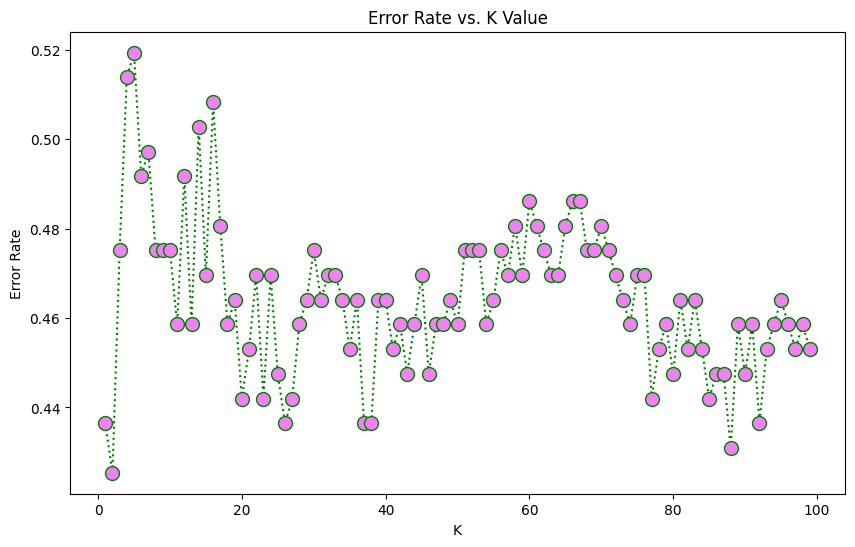

In [ ]:
error_rate = []
for i in range(1,100):
    k_nearest_neighbor_model = KNeighborsClassifier(n_neighbors=i)
    k_nearest_neighbor_model.fit(X_train,y_train)
    pred_i = k_nearest_neighbor_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='green', linestyle='dotted', marker='o',
         markerfacecolor='violet', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[42 48]
 [42 49]]


              precision    recall  f1-score   support

         0.0       0.50      0.47      0.48        90
         1.0       0.51      0.54      0.52        91

    accuracy                           0.50       181
   macro avg       0.50      0.50      0.50       181
weighted avg       0.50      0.50      0.50       181



In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=17


[[37 53]
 [34 57]]


              precision    recall  f1-score   support

         0.0       0.52      0.41      0.46        90
         1.0       0.52      0.63      0.57        91

    accuracy                           0.52       181
   macro avg       0.52      0.52      0.51       181
weighted avg       0.52      0.52      0.51       181



In [ ]:
knn.score(X_test, y_test)

0.5193370165745856

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 0.5193370165745856
Precision: 0.5181818181818182
Recall: 0.6263736263736264


In [ ]:
#prediction using knn
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=knn.predict(x_new)
print(classes[y_predict[0]])

On Fire


In [ ]:
# Support Vector Machine
from sklearn.svm import SVR # Import SVR instead of SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import numpy as np # Import the NumPy library and alias it as 'np'

# Load the dataset
fires = pd.read_csv('/content/Forestfires.csv')

# Encode categorical features ('month' and 'day')
le = LabelEncoder()
fires['month'] = le.fit_transform(fires['month'])
fires['day'] = le.fit_transform(fires['day'])

# fit a SVM model to the data
X = fires.drop('area', axis=1)
y = fires['area']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

svr = SVR() # Use SVR for regression
svr.fit(X_train, y_train)

# make predictions
prediction = svr.predict(X_test)

# Evaluate the model using appropriate metrics for regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 16.96807267164912
Mean Squared Error: 4866.357441576156
Root Mean Squared Error: 69.75928211769497


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Load dataset
fires = pd.read_csv('Forestfires.csv')

# Create the output column where output = 1 if area > 0, else 0
fires['output'] = fires['area'].apply(lambda x: 1 if x > 0 else 0)

# Drop categorical columns 'month', 'day', and target 'area'
fires_numeric = fires.drop(['month', 'day', 'area'], axis=1)

# Define features and target
X = fires_numeric.drop('output', axis=1)
y = fires_numeric['output']

# Optional: Normalize the features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (30% testing data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# Initialize the Support Vector Classifier (SVC)
svm_model = SVC()

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel types
    'gamma': ['scale', 'auto'],          # Kernel coefficient
    'degree': [2, 3, 4],                 # Degree for 'poly' kernel
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Train the model with the best parameters
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best Parameters Found:", grid_search.best_params_)

# Print classification report and confusion matrix
classification_report = metrics.classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

# Extract overall metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

# Print accuracy, precision, recall, F1-score
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Best Parameters Found: {'C': 100, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.36      0.40        69
           1       0.56      0.66      0.61        87

    accuracy                           0.53       156
   macro avg       0.51      0.51      0.50       156
weighted avg       0.52      0.53      0.52       156

Confusion Matrix:
 [[25 44]
 [30 57]]

Accuracy: 0.53
Precision: 0.56
Recall: 0.66
F1 Score: 0.61


In [ ]:
#prediction using svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.svm import SVC

classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]

# Assuming svm_model is the fitted SVC model from previous code
y_predict = svm_model.predict(x_new)
print(classes[y_predict[0]])

safe


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#prediction using decision tree
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0, 0]] # Added a missing feature to make it 13
y_predict=d_tree.predict(x_new)
print(classes[y_predict[0]])

safe


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


naive bayes

In [ ]:
#import naive bayes
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

X = fires.drop('output', axis=1)
y = fires['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

# fit a Naive Bayes model to the data
G_NB = GaussianNB()
G_NB.fit(X_train,y_train)
print(G_NB)
# make predictions

predict = G_NB.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predict))
print(metrics.confusion_matrix(y_test, predict))

print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))



GaussianNB()
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       0.99      1.00      0.99        87

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156

[[68  1]
 [ 0 87]]
Accuracy: 0.9935897435897436
Precision: 0.9886363636363636
Recall: 1.0


In [ ]:
#prediction using naive bayes
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0, 0]] # Added a missing feature to make it 13
y_predict=G_NB.predict(x_new)
print(classes[y_predict[0]])

safe


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


random forest

In [ ]:
#prediction using random forest
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0, 0]] # Added missing feature to make it 13
y_predict=random_forest.predict(x_new)
print(classes[y_predict[0]])

safe


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Load the dataset
fires = pd.read_csv('Forestfires.csv')

# Create the output column (binary classification: 1 if area > 0, else 0)
fires['output'] = fires['area'].apply(lambda x: 1 if x > 0 else 0)

# Drop unnecessary columns (month and day are categorical, area is the target feature)
fires_cleaned = fires.drop(['month', 'day', 'area'], axis=1)

# Features and target definition
X = fires_cleaned.drop('output', axis=1)  # All columns except 'output'
y = fires_cleaned['output']               # Target: 'output' column

# Split the dataset into training and testing sets (30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Instantiate the RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred = random_forest.predict(X_test)

# Generate classification report
report = metrics.classification_report(y_test, y_pred)

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Calculate evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# Display the results
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.64      0.57        69
           1       0.64      0.52      0.57        87

    accuracy                           0.57       156
   macro avg       0.58      0.58      0.57       156
weighted avg       0.58      0.57      0.57       156

Confusion Matrix:
 [[44 25]
 [42 45]]
Accuracy: 0.57
Precision: 0.64
Recall: 0.52
F1 Score: 0.57


decision tree


Best Parameters Found: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.43      0.45        69
           1       0.58      0.61      0.59        87

    accuracy                           0.53       156
   macro avg       0.52      0.52      0.52       156
weighted avg       0.53      0.53      0.53       156

Confusion Matrix:
 [[30 39]
 [34 53]]

Accuracy: 0.53
Precision: 0.58
Recall: 0.61
F1 Score: 0.59


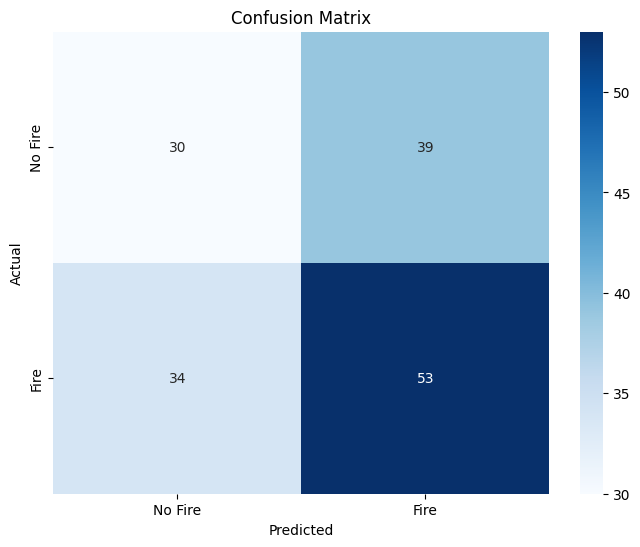

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
fires = pd.read_csv('Forestfires.csv')

# Create the output column where output = 1 if area > 0, else 0
fires['output'] = fires['area'].apply(lambda x: 1 if x > 0 else 0)

# Drop categorical columns 'month', 'day', and target 'area'
fires_numeric = fires.drop(['month', 'day', 'area'], axis=1)

# Define features and target
X = fires_numeric.drop('output', axis=1)
y = fires_numeric['output']

# Optional: Normalize the features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (30% testing data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# Initialize Decision Tree Classifier
d_tree = DecisionTreeClassifier()

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum samples in a leaf node
}

# Perform GridSearchCV to search for the best parameters
grid_search = GridSearchCV(estimator=d_tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Train the model with the best parameters
best_d_tree = grid_search.best_estimator_
best_d_tree.fit(X_train, y_train)

# Make predictions
y_pred = best_d_tree.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best Parameters Found:", grid_search.best_params_)

# Print classification report and confusion matrix
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plotting Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Best Parameters Found for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.48      0.47        69
           1       0.58      0.57      0.58        87

    accuracy                           0.53       156
   macro avg       0.53      0.53      0.53       156
weighted avg       0.53      0.53      0.53       156

Decision Tree Confusion Matrix:
 [[33 36]
 [37 50]]

Decision Tree Accuracy: 0.53
Decision Tree Precision: 0.58
Decision Tree Recall: 0.57
Decision Tree F1 Score: 0.58

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.42      0.42        69
           1       0.54      0.54      0.54        87

    accuracy                           0.49       156
   macro avg       0.48      0.48      0.48       156
weighted avg       

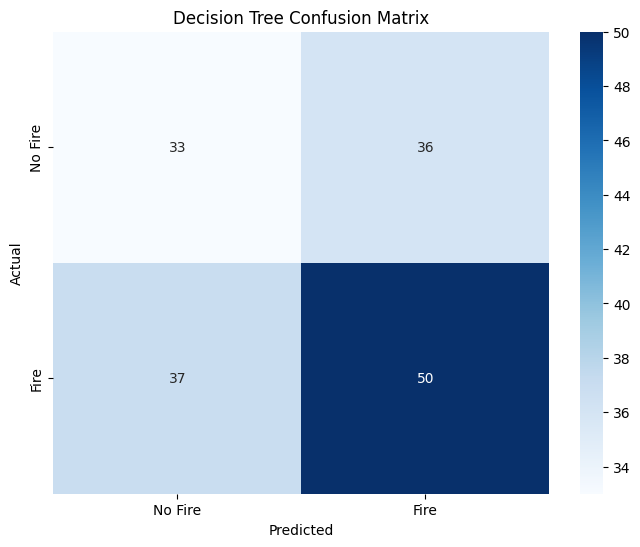

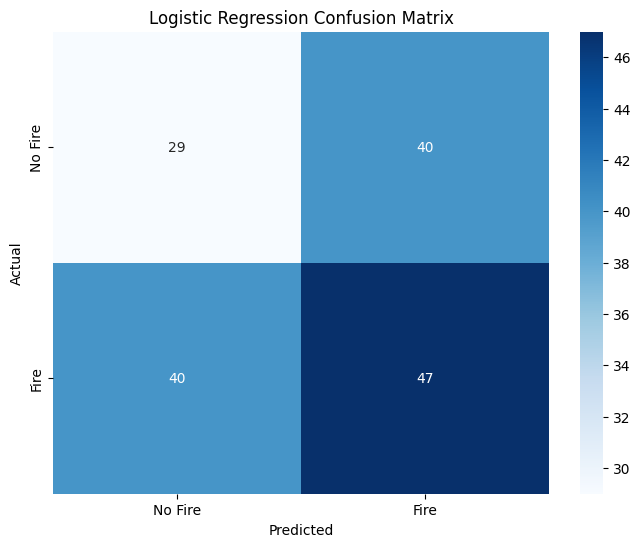

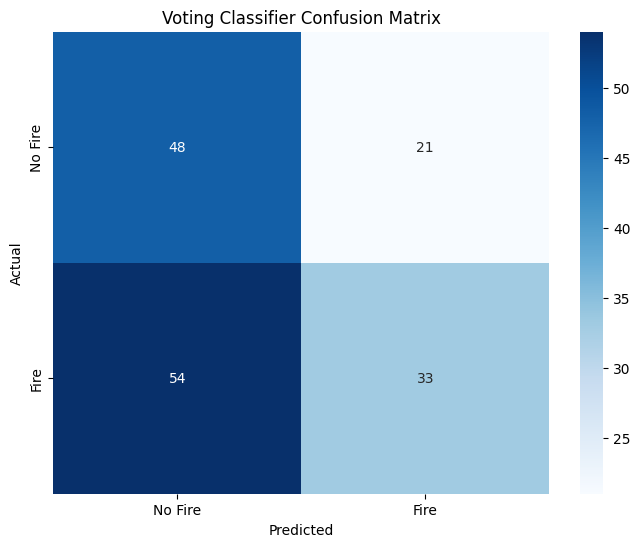

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
fires = pd.read_csv('Forestfires.csv')

# Create the output column where output = 1 if area > 0, else 0
fires['output'] = fires['area'].apply(lambda x: 1 if x > 0 else 0)

# Drop categorical columns 'month', 'day', and target 'area'
fires_numeric = fires.drop(['month', 'day', 'area'], axis=1)

# Define features and target
X = fires_numeric.drop('output', axis=1)
y = fires_numeric['output']

# Robust scaling for better performance
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (30% testing data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# Initialize Decision Tree Classifier
d_tree = DecisionTreeClassifier()

# Define hyperparameters to tune for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum samples in a leaf node
}

# Perform GridSearchCV to search for the best parameters for Decision Tree
grid_search = GridSearchCV(estimator=d_tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Train the model with the best parameters
best_d_tree = grid_search.best_estimator_
best_d_tree.fit(X_train, y_train)

# Make predictions with Decision Tree
y_pred_dt = best_d_tree.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best Parameters Found for Decision Tree:", grid_search.best_params_)

# Print classification report and confusion matrix for Decision Tree
print("\nDecision Tree Classification Report:\n", metrics.classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_dt))

# Calculate and print metrics for Decision Tree
accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
precision_dt = metrics.precision_score(y_test, y_pred_dt)
recall_dt = metrics.recall_score(y_test, y_pred_dt)
f1_dt = metrics.f1_score(y_test, y_pred_dt)

print(f"\nDecision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Decision Tree Precision: {precision_dt:.2f}")
print(f"Decision Tree Recall: {recall_dt:.2f}")
print(f"Decision Tree F1 Score: {f1_dt:.2f}")

# Initialize Logistic Regression
logistic_model = LogisticRegression(random_state=101)

# Train Logistic Regression model
logistic_model.fit(X_train, y_train)

# Make predictions with Logistic Regression
y_pred_lr = logistic_model.predict(X_test)

# Print classification report and confusion matrix for Logistic Regression
print("\nLogistic Regression Classification Report:\n", metrics.classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_lr))

# Calculate and print metrics for Logistic Regression
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
precision_lr = metrics.precision_score(y_test, y_pred_lr)
recall_lr = metrics.recall_score(y_test, y_pred_lr)
f1_lr = metrics.f1_score(y_test, y_pred_lr)

print(f"\nLogistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Logistic Regression Precision: {precision_lr:.2f}")
print(f"Logistic Regression Recall: {recall_lr:.2f}")
print(f"Logistic Regression F1 Score: {f1_lr:.2f}")

# Create an ensemble voting classifier
voting_classifier = VotingClassifier(
    estimators=[('dt', best_d_tree), ('lr', logistic_model)],
    voting='hard'  # Can use 'soft' for probabilistic voting
)

# Train the ensemble model
voting_classifier.fit(X_train, y_train)

# Make predictions with the ensemble model
y_pred_voting = voting_classifier.predict(X_test)

# Print classification report and confusion matrix for Voting Classifier
print("\nVoting Classifier Classification Report:\n", metrics.classification_report(y_test, y_pred_voting))
print("Voting Classifier Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_voting))

# Calculate and print metrics for Voting Classifier
accuracy_voting = metrics.accuracy_score(y_test, y_pred_voting)
precision_voting = metrics.precision_score(y_test, y_pred_voting)
recall_voting = metrics.recall_score(y_test, y_pred_voting)
f1_voting = metrics.f1_score(y_test, y_pred_voting)

print(f"\nVoting Classifier Accuracy: {accuracy_voting:.2f}")
print(f"Voting Classifier Precision: {precision_voting:.2f}")
print(f"Voting Classifier Recall: {recall_voting:.2f}")
print(f"Voting Classifier F1 Score: {f1_voting:.2f}")

# Plotting Confusion Matrix for Decision Tree
confusion_matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Plotting Confusion Matrix for Logistic Regression
confusion_matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Plotting Confusion Matrix for Voting Classifier
confusion_matrix_voting = metrics.confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_voting, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Voting Classifier Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load dataset
fires = pd.read_csv('Forestfires.csv')

# Create the output column where output = 1 if area > 0, else 0
fires['output'] = fires['area'].apply(lambda x: 1 if x > 0 else 0)

# Drop categorical columns 'month', 'day', and target 'area'
fires_numeric = fires.drop(['month', 'day', 'area'], axis=1)

# Define features and target
X = fires_numeric.drop('output', axis=1)
y = fires_numeric['output']

# Robust scaling for better performance
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for CNN (1D convolution)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split the data into training and testing sets (30% testing data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Initialize the CNN model
model = Sequential()

# Add layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))  # 2 output classes (0 and 1)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_data=(X_test, y_test_cat))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification report and confusion matrix
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.5172 - loss: 0.7750 - val_accuracy: 0.6218 - val_loss: 0.6949
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5189 - loss: 0.7148 - val_accuracy: 0.5385 - val_loss: 0.7020
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5339 - loss: 0.7191 - val_accuracy: 0.5256 - val_loss: 0.6908
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4835 - loss: 0.7155 - val_accuracy: 0.5192 - val_loss: 0.6903
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5592 - loss: 0.6790 - val_accuracy: 0.5321 - val_loss: 0.6910
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5738 - loss: 0.6934 - val_accuracy: 0.5833 - val_loss: 0.6857
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5316 - loss: 0.6872 - val_accuracy: 0.5641 - val_loss: 0.6843
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5569 - loss: 0.7024 - val_accuracy: 0.5577 - v

xg boost


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:06:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


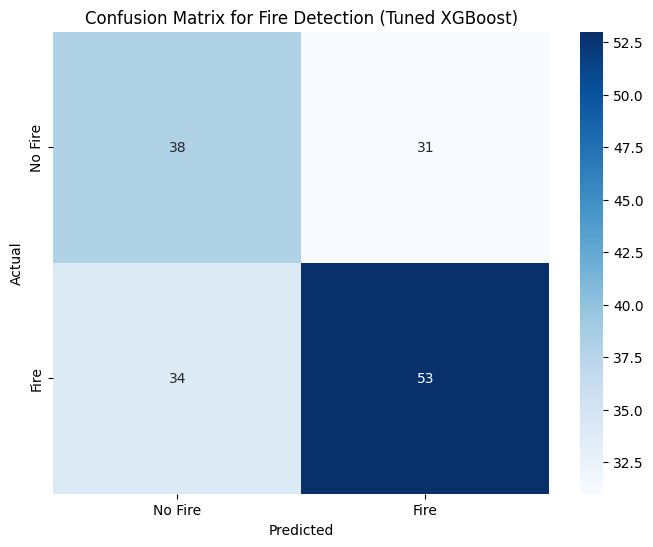

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0},
 {'Accuracy': 0.5833333333333334,
  'Precision': 0.6309523809523809,
  'Recall': 0.6091954022988506,
  'F1 Score': 0.6198830409356725})

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 1.0]  # Subsample ratio of the training instances
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Fire Detection (Tuned XGBoost)')
plt.show()

# Output the best parameters and the performance metrics
grid_search.best_params_, {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}


Ensemble Voting Classifier Results:
Accuracy: 0.5833333333333334
Precision: 0.6571428571428571
Recall: 0.5287356321839081
F1 Score: 0.5859872611464968

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.65      0.58        69
           1       0.66      0.53      0.59        87

    accuracy                           0.58       156
   macro avg       0.59      0.59      0.58       156
weighted avg       0.60      0.58      0.58       156

Confusion Matrix:
 [[45 24]
 [41 46]]


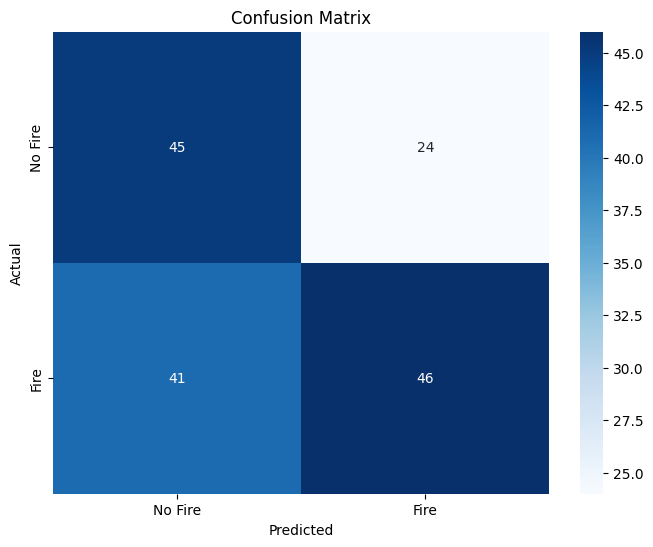

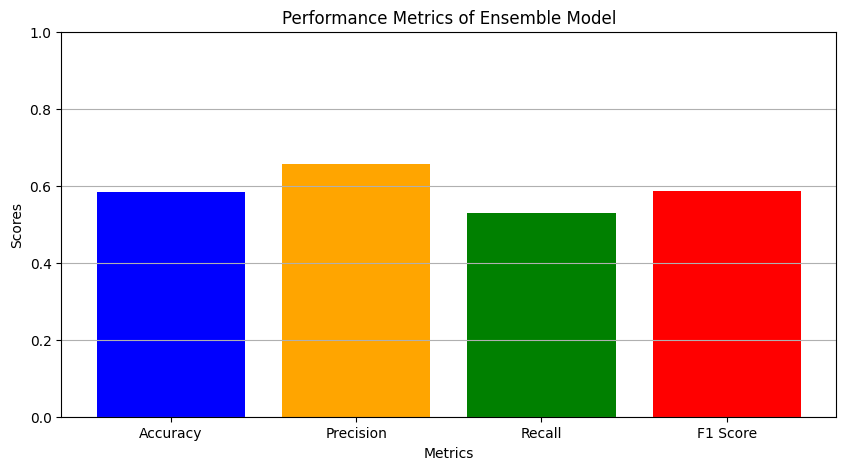

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier  # Import XGBoost

# Load the dataset
fires = pd.read_csv('/content/Forestfires.csv')

# Create the output column where output = 1 if area > 0, else 0
fires['output'] = fires['area'].apply(lambda x: 1 if x > 0 else 0)

# Drop categorical columns 'month', 'day', and target 'area'
fires_numeric = fires.drop(['month', 'day', 'area'], axis=1)

# Define features and target
X = fires_numeric.drop('output', axis=1)
y = fires_numeric['output']

# Optional: Normalize the features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (30% testing data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# Define individual models
naive_bayes = GaussianNB()
random_forest = RandomForestClassifier(random_state=101)
xgboost_classifier = XGBClassifier(random_state=101)  # XGBoost classifier

# Create an ensemble voting classifier
voting_classifier = VotingClassifier(
    estimators=[('nb', naive_bayes), ('rf', random_forest), ('xgb', xgboost_classifier)],
    voting='hard'  # Can use 'soft' for probabilistic voting
)

# Train the ensemble model
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred = voting_classifier.predict(X_test)

# Evaluate the ensemble model
classification_report = metrics.classification_report(y_test, y_pred, output_dict=True)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Calculate and print metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

# Print results
print("Ensemble Voting Classifier Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Plotting Performance Metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1_score]

plt.figure(figsize=(10, 5))
plt.bar(metrics_names, metrics_values, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Performance Metrics of Ensemble Model')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.grid(axis='y')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier

# Load the dataset
file_path = '/content/Forestfires.csv'  # Update the path as needed
df = pd.read_csv(file_path)

# Display first few rows of the dataset
print(df.head())

# Check for any missing values
print(df.isnull().sum())

# Dropping irrelevant columns if applicable (modify based on your dataset)
df.drop(['day', 'month'], axis=1, inplace=True)  # Adjust depending on your dataset


df['fire'] = (df['area'] > 0).astype(int)

X = df.drop(['fire', 'area'], axis=1)
y = df['fire']

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing (normalizing) the features to ensure even scaling for all inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the shape of the training and testing sets
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
Training set size: (413, 10)
Test set size: (104, 10)


In [ ]:
# Initialize the MLP classifier with desired hyperparameters
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
                    max_iter=500,                  # Maximum number of iterations (epochs)
                    activation='relu',             # Activation function (ReLU is common for MLP)
                    solver='adam',                 # Optimization algorithm (Adam is widely used)
                    random_state=42)

# Train the MLP model on the training set
mlp.fit(X_train, y_train)

# Predicting the test set results
y_pred = mlp.predict(X_test)

# Evaluating the MLP model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 60.58%
              precision    recall  f1-score   support

           0       0.62      0.51      0.56        51
           1       0.60      0.70      0.64        53

    accuracy                           0.61       104
   macro avg       0.61      0.60      0.60       104
weighted avg       0.61      0.61      0.60       104



Confusion Matrix with K=17:
[[26 25]
 [18 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.51      0.55        51
           1       0.58      0.66      0.62        53

    accuracy                           0.59       104
   macro avg       0.59      0.59      0.58       104
weighted avg       0.59      0.59      0.58       104



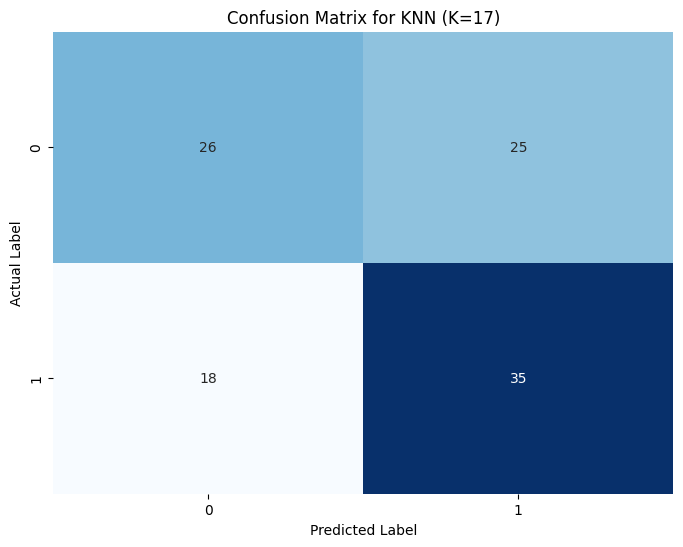

In [ ]:
# Import necessary libraries for visualization and confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
file_path = '/content/Forestfires.csv'  # Replace with correct dataset path
df = pd.read_csv(file_path)
#Create the 'fire' column
df['fire'] = (df['area'] > 0).astype(int)

# Assuming 'fire' is the target column (modify based on your dataset)
X = df.drop(['fire', 'day', 'month'], axis=1)  # Dropping irrelevant columns
y = df['fire']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing (normalizing) the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize KNN classifier with k=17
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Display the confusion matrix and classification report
cm = confusion_matrix(y_test, pred)
print('Confusion Matrix with K=17:')
print(cm)
print('\nClassification Report:')
print(classification_report(y_test, pred))

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for KNN (K=17)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

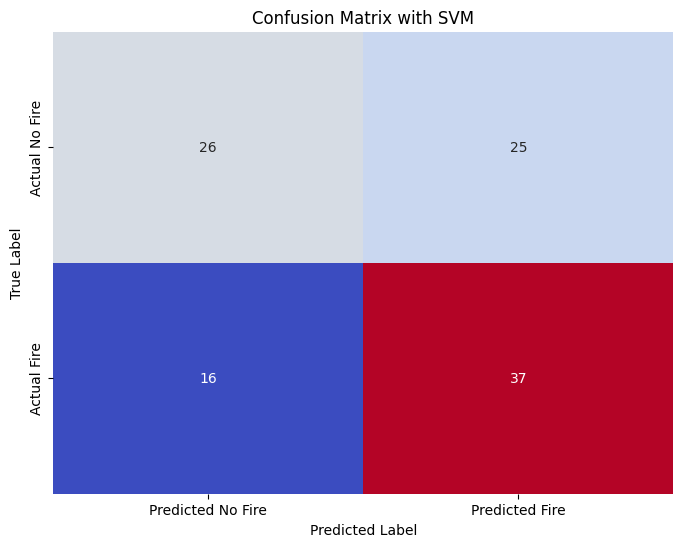

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Predicted No Fire', 'Predicted Fire'],
            yticklabels=['Actual No Fire', 'Actual Fire'])

# Add labels, title, and display the plot
plt.title('Confusion Matrix with SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


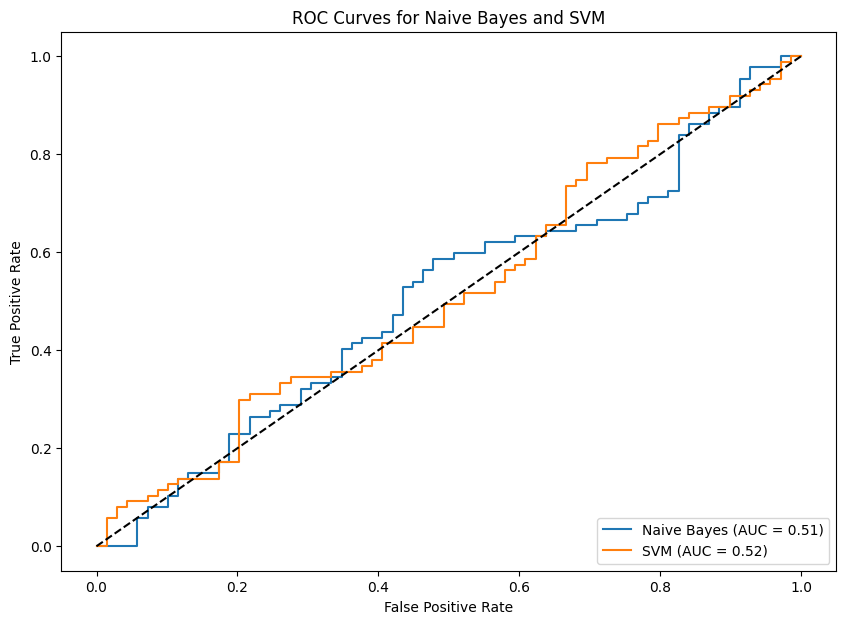

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

# Load dataset
fires = pd.read_csv('Forestfires.csv')

# Data cleaning
# Check for missing values and drop rows/columns with missing data if necessary
fires = fires.dropna()

# Create the output column where output = 1 if area > 0, else 0
fires['output'] = fires['area'].apply(lambda x: 1 if x > 0 else 0)

# Drop unnecessary columns 'month', 'day', and target 'area'
fires_cleaned = fires.drop(['month', 'day', 'area'], axis=1)

# Define features and target
X = fires_cleaned.drop('output', axis=1)
y = fires_cleaned['output']

# Split the data into training and testing sets (30% testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Plot the ROC curves for both models
plt.figure(figsize=(10,7))

### 1. Naive Bayes model ###
# Fit the Naive Bayes model
G_NB = GaussianNB()
G_NB.fit(X_train, y_train)

# Predict probabilities for Naive Bayes
nb_pred_prob = G_NB.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Plot ROC for Naive Bayes
plot_roc_curve(y_test, nb_pred_prob, "Naive Bayes")

### 2. SVM model (with GridSearchCV) ###
# Standardize the features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# Initialize the Support Vector Classifier (SVC)
svm_model = SVC()

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto'],           # Kernel coefficient
    'degree': [2, 3, 4],                  # Degree for 'poly' kernel
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_svm, y_train_svm)

# Get the best model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Predict decision function values for SVM (needed for ROC)
svm_pred_prob = best_svm_model.decision_function(X_test_svm)

# Plot ROC for SVM
plot_roc_curve(y_test_svm, svm_pred_prob, "SVM")

# Add plot labels and legend
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Naive Bayes and SVM')
plt.legend(loc='lower right')
plt.show()


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:30:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


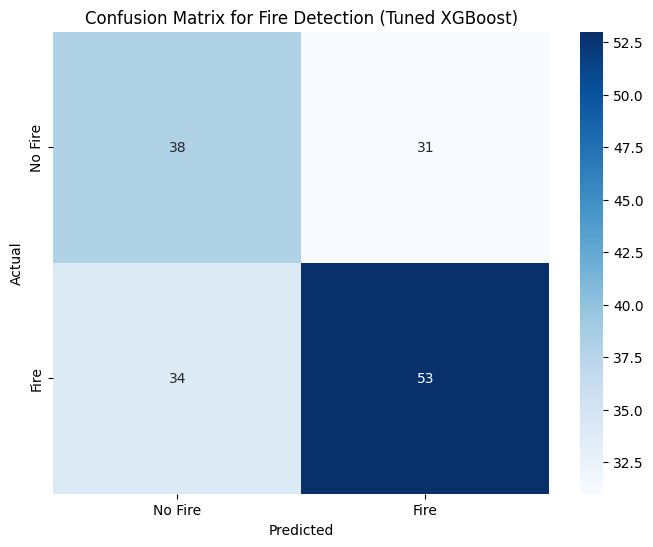

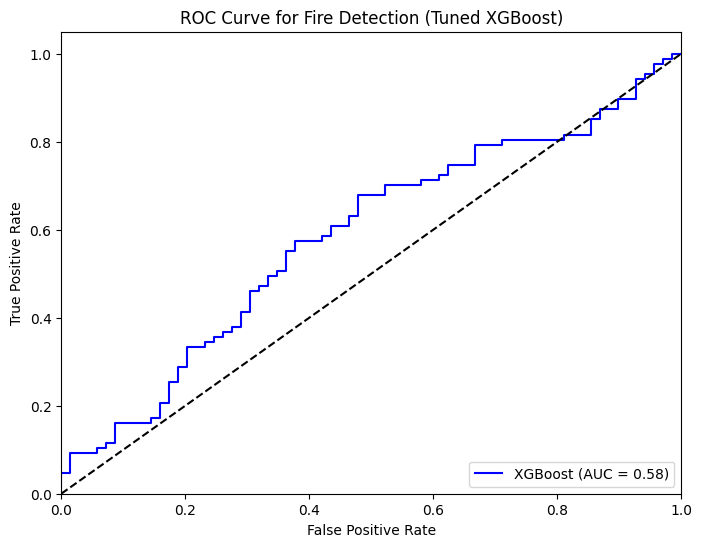

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0},
 {'Accuracy': 0.5833333333333334,
  'Precision': 0.6309523809523809,
  'Recall': 0.6091954022988506,
  'F1 Score': 0.6198830409356725})

In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 1.0]  # Subsample ratio of the training instances
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Fire Detection (Tuned XGBoost)')
plt.show()

# ROC curve and AUC
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for the positive class (fire)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)  # Calculate the false positive and true positive rates
auc_score = roc_auc_score(y_test, y_pred_prob)  # Calculate the AUC (Area Under the Curve)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fire Detection (Tuned XGBoost)')
plt.legend(loc='lower right')
plt.show()

# Output the best parameters and the performance metrics
grid_search.best_params_, {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}
